# Exploring the Weather in Athens

In this project we will explore the weather in Athens over a period of more than 50 years. 

---

> Chalkiopoulos Georgios, Electrical and Computer Engineer NTUA <br>
> Data Science postgraduate Student <br> 
> gchalkiopoulos@aueb.gr

# Intro 

There are 5 sections in this project. The first one focuses on abtaining and preparing the data and the remaining 4 at creating a graph while commenting on the results. 

In Brief the sections are:
* Obtain the data
* Deviation of Summer Temperatures (Graph)
* Evolution of Daily Temperatures (Graph)
* Extreme Temperature Events (Graph)
* Precipitation (Graph)


# Imports

In [38]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

## Section 1: Obtain the Data

We will work with data covering the period from 1955 to 2020. The data will be obtained from two sources:

* Data downloaded from the [National Oceanic and Atmospheric Administration's National Centers for Environmental Information](https://www.ncdc.noaa.gov/cdo-web/) and in [particular](https://www.ncdc.noaa.gov/cdo-web/search). 

* As we are focusing on Athens, we will use the data from the Hellinikon weather station and we will concentrate on the average daily temperature and precipitation.

* Explore the completeness of the data. **What data are missing?**

* To fill in any missing data we will use an alternative dataset available from [hellenicdataservice](https://data.hellenicdataservice.gr/dataset/66e1c19a-7b0e-456f-b465-b301a1130e3f); this dataset covers only the period from 2010-2019.

In order to download the data, from the National Oceanic and Atmospheric Administration's National Centers for Environmental Information, a form was filled and the data was sent trough email. For the sake of simplicity the csv file has been added to the corresponding repo and we will access it directly through that. 

In [39]:
# read the National Oceanic and Atmospheric Administration's National Centers for Environmental Information
df = pd.read_csv('./ncdc_data.csv')

In [40]:
# fetch the first lines
df.head()

,STATION,NAME,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
0,GR000016716,"HELLINIKON, GR",1955-01-01,0.00,NaN,NaN,65.0,50.0
1,GR000016716,"HELLINIKON, GR",1955-01-02,0.08,NaN,NaN,58.0,45.0
2,GR000016716,"HELLINIKON, GR",1955-01-03,0.00,NaN,NaN,60.0,49.0
3,GR000016716,"HELLINIKON, GR",1955-01-04,0.00,NaN,NaN,66.0,45.0
4,GR000016716,"HELLINIKON, GR",1955-01-05,0.00,NaN,NaN,64.0,47.0


### **Data exploration**
In order to get a better understading of the data, we used the [Documention](https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf), and looked for the specific columns that we have in our dataset. Below is a brief description of the data:

| Attribute | Description |
| ------------- |:-------------:| 
| STATION | *(17 characters) is the station identification code*. In our case since we selected only one station this should be unique |
| NAME | *max 50 characters) is the name of the station (usually city/airport name).* Again only one station was selected so this one is HELLINIKON, GR |
| DATE | *the year of the record (4 digits) followed by month (2 digits) and day (2 digits).* |
| PRCP | *Precipitation (mm or inches as per user preference, inches to hundredths on Daily Form pdf file)* |
| SNWD | *Snow depth (mm or inches as per user preference, inches on Daily Form pdf file)* |
| TAVG | *Average Temperature* |
| TMAX | *Maximum temperature (Fahrenheit or Celsius as per user preference, Fahrenheit to tenths on Daily Form pdf file* |
| TMIN | *Minimum temperature (Fahrenheit or Celsius as per user preference, Fahrenheit to tenths on Daily Form pdf file* |

<br>
> In our case all values are in Inches and Fahrenheit.

* Let's exprolre the data

In [41]:
# get info about the dataframe
df.describe()

,PRCP,SNWD,TAVG,TMAX,TMIN
count,22773.000000,30.000000,20940.000000,22307.000000,22418.000000
mean,0.039799,6.006667,64.884575,72.225669,58.047596
std,0.182426,13.950922,12.471614,13.309235,11.631550
min,0.000000,0.400000,28.000000,34.000000,24.000000
25%,0.000000,0.400000,55.000000,62.000000,49.000000
50%,0.000000,0.800000,64.000000,71.000000,58.000000
75%,0.000000,1.600000,76.000000,84.000000,68.000000
max,5.590000,48.800000,95.000000,108.000000,87.000000


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23251 entries, 0 to 23250
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  23251 non-null  object 
 1   NAME     23251 non-null  object 
 2   DATE     23251 non-null  object 
 3   PRCP     22773 non-null  float64
 4   SNWD     30 non-null     float64
 5   TAVG     20940 non-null  float64
 6   TMAX     22307 non-null  float64
 7   TMIN     22418 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.4+ MB


* We ll start by converting the Temperature and Precipitation columns to Celcius and mm respectively.

In [43]:
# Convert F to C
df[['TAVG', 'TMAX', 'TMIN']] = df[['TAVG', 'TMAX', 'TMIN']].apply(lambda row: (row - 32) * 5/9)
df[['TAVG', 'TMAX', 'TMIN']].head()

,TAVG,TMAX,TMIN
0,NaN,18.333333,10.000000
1,NaN,14.444444,7.222222
2,NaN,15.555556,9.444444
3,NaN,18.888889,7.222222
4,NaN,17.777778,8.333333


In [44]:
# Convert inches to mm
df['PRCP'] = df['PRCP'] * 25.4
df['PRCP'].head()

0    0.000
1    2.032
2    0.000
3    0.000
4    0.000
Name: PRCP, dtype: float64

### Missing Data

* First let's see how much data is missing, before deciding on how to handle missing values.

In [55]:
# Perform an assessment of how much data is missing in each column of the dataset.
null_values_per_column =(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)*100
null_values_per_column

SNWD       99.870973
TAVG        9.939357
TMAX        4.060040
TMIN        3.582642
PRCP        2.055826
DATE        0.000000
NAME        0.000000
STATION     0.000000
dtype: float64

Most of the missing data is located in the Snow Depth (SNWD) column which is of no interest for this analysis. We will, therefore, focus on the other columns.

In [85]:
print(f"The average of the difference between TMAX and TMIN is {((df['TMAX']-df['TMIN'])/2).mean()} \
while the average temperature is {(df['TAVG']).mean()}")

The average of the difference between TMAX and TMIN is 3.9790942819952955 while the average temperature is 18.269208320067968


C:\Users\jojoshulk\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\jojoshulk\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([  30.,  294., 1590., 3107., 4261., 3199., 2661., 3520., 2097.,
         181.]),
 array([-2.22222222,  1.5       ,  5.22222222,  8.94444444, 12.66666667,
        16.38888889, 20.11111111, 23.83333333, 27.55555556, 31.27777778,
        35.        ]),
 <a list of 10 Patch objects>)

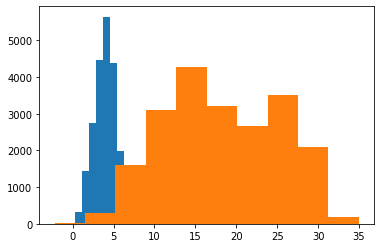

In [71]:
plt.hist((df['TMAX']-df['TMIN'])/2)
plt.hist(df['TAVG'])
plt.hist(df['TAVG'])

## Download alternative dataset

In [86]:
# alternative dataset
df2 = pd.read_csv('https://data.hellenicdataservice.gr/dataset/d3b0d446-aaba-49a8-acce-e7c6f6f5d3b5/resource/a7c024b3-8606-4f08-93e2-2042f5bd6748/download/athens.csv')

In [88]:
df2.head()

,2010-01-01,17.9,18.1,17.8,61.4,91,33,1003.6,1006.3,1002.0,0.2,4.0,WSW,12.7
0,2010-01-02,15.6,15.7,15.5,57.4,70,45,1005.2,1008.7,1001.5,0.0,6.8,WSW,20.7
1,2010-01-03,13.5,13.6,13.4,56.0,76,39,1011.7,1016.7,1008.6,0.0,5.0,WSW,15.4
2,2010-01-04,9.5,9.6,9.5,50.7,60,38,1021.3,1023.1,1016.8,0.0,4.3,NNE,11.0
3,2010-01-05,13.4,13.5,13.4,70.5,82,54,1018.7,1022.1,1015.5,0.0,7.9,S,19.8
4,2010-01-06,16.8,16.9,16.8,79.3,83,72,1012.9,1015.6,1011.1,0.0,15.2,S,34.3


The dataset from the Hellenic Data Service doesn't have any headers. From the [Website](https://data.hellenicdataservice.gr/dataset/66e1c19a-7b0e-456f-b465-b301a1130e3f/resource/a7c024b3-8606-4f08-93e2-2042f5bd6748) we read that: <br>
*Each line consists of 14 columns. First is the date of the parameters (YYYY-MM-DD). Next are the mean, maximum and minimum Humerature (°C). After that and in the same order we have 6 columns for relative humidity and atmospheric pressure (%, hPa). The tenth column is the daily rainfall (mm). In the last 3 columns we can see mean wind speed, dominant wind direction as well as wind gust (km/h).*

In [96]:
col_names = ['DATE', 
    'Temp_mean', 'Temp_max', 'Temp_min', 
    'Hum_mean', 'Hum_max', 'Hum_min',
    'Press_mean', 'Press_max', 'Press_min',
    'Rain', 
    'Wind_Speed_mean', 'Wind_dir', 'Wind_Speed_max'
]
df2.columns = col_names
df2.head()

,DATE,Temp_mean,Temp_max,Temp_min,Hum_mean,Hum_max,Hum_min,Press_mean,Press_max,Press_min,Rain,Wind_Speed_mean,Wind_dir,Wind_Speed_max
0,2010-01-02,15.6,15.7,15.5,57.4,70,45,1005.2,1008.7,1001.5,0.0,6.8,WSW,20.7
1,2010-01-03,13.5,13.6,13.4,56.0,76,39,1011.7,1016.7,1008.6,0.0,5.0,WSW,15.4
2,2010-01-04,9.5,9.6,9.5,50.7,60,38,1021.3,1023.1,1016.8,0.0,4.3,NNE,11.0
3,2010-01-05,13.4,13.5,13.4,70.5,82,54,1018.7,1022.1,1015.5,0.0,7.9,S,19.8
4,2010-01-06,16.8,16.9,16.8,79.3,83,72,1012.9,1015.6,1011.1,0.0,15.2,S,34.3


In [97]:
df2.describe()

,Hum_mean,Hum_max,Hum_min,Press_mean,Press_max,Press_min,Rain,Wind_Speed_mean,Wind_Speed_max
count,3651.000000,3651.000000,3651.000000,3651.000000,3651.000000,3651.000000,3651.00000,3651.000000,3651.000000
mean,60.689729,75.155848,45.713503,1015.312380,1017.354259,1013.223035,1.25582,4.609860,11.954944
std,12.753988,12.015063,13.018725,6.102371,5.994064,6.389216,4.99461,3.227916,6.312166
min,26.300000,38.000000,13.000000,992.300000,999.400000,983.400000,0.00000,0.200000,2.000000
25%,50.650000,67.000000,36.000000,1011.300000,1013.100000,1009.300000,0.00000,2.300000,7.500000
50%,61.300000,77.000000,45.000000,1014.600000,1016.500000,1012.700000,0.00000,3.600000,10.300000
75%,70.700000,85.000000,55.000000,1019.200000,1021.200000,1017.100000,0.00000,6.100000,15.100000
max,90.100000,96.000000,85.000000,1037.100000,1039.400000,1036.300000,97.00000,23.200000,46.300000


* Let's join both dataset to see if we can fill any missing data on the original one.

In [101]:
 merged = pd.merge(df[['STATION', 'NAME',	'DATE',	'PRCP',	'SNWD',	'TAVG',	'TMAX',	'TMIN']],
        df2[['DATE',	'Temp_mean',	'Temp_max',	'Temp_min']],
        on='DATE',
        how='left')
merged.head()

,STATION,NAME,DATE,PRCP,SNWD,TAVG,TMAX,TMIN,Temp_mean,Temp_max,Temp_min
0,GR000016716,"HELLINIKON, GR",1955-01-01,0.000,NaN,NaN,18.333333,10.000000,NaN,NaN,NaN
1,GR000016716,"HELLINIKON, GR",1955-01-02,2.032,NaN,NaN,14.444444,7.222222,NaN,NaN,NaN
2,GR000016716,"HELLINIKON, GR",1955-01-03,0.000,NaN,NaN,15.555556,9.444444,NaN,NaN,NaN
3,GR000016716,"HELLINIKON, GR",1955-01-04,0.000,NaN,NaN,18.888889,7.222222,NaN,NaN,NaN
4,GR000016716,"HELLINIKON, GR",1955-01-05,0.000,NaN,NaN,17.777778,8.333333,NaN,NaN,NaN


In [106]:
merged['TAVG'] = merged['TMAX'].combine_first(merged['Temp_mean'])
merged['TAVG'].isnull().sum()

124

In [110]:
merged['TAVG'].fillna(0).astype(float) - merged['Temp_mean'].fillna(merged['TAVG'].fillna(0)).astype(float)

ValueError: could not convert string to float: '---'

0        18.3333
1        14.4444
2        15.5556
3        18.8889
4        17.7778
          ...   
23246        NaN
23247    18.3333
23248         20
23249         20
23250    18.3333
Name: Temp_mean, Length: 23251, dtype: object